<a href="https://colab.research.google.com/github/majedSD/Assignment_Flutter/blob/master/2019331563.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.bmp`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



## Lab Resources
https://drive.google.com/drive/folders/1LCzyaqtd0LmaHKQUTkZUNh2RAK0bDna0?usp=sharing

Image Dimension:  225 225 3


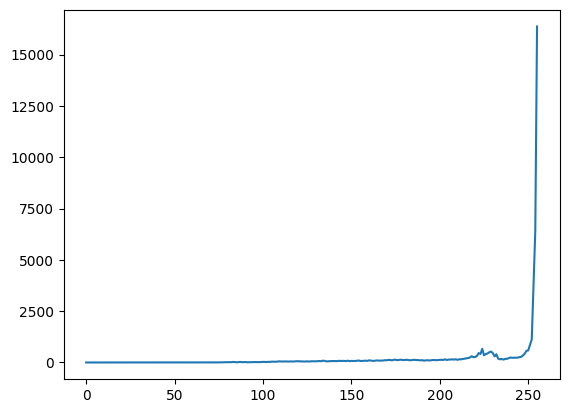

Min intensity:  5
Max intensity:  255
251


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 =  cv2.imread('DIP_Lab_task_01.png')

rows, cols, channels = img1.shape
print("Image Dimension: ", rows, cols, channels)

# frequency distribution
hist = cv2.calcHist([img1], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

#range
print("Min intensity: ", img1.min())
print("Max intensity: ", img1.max())
print(img1.max() - img1.min() + 1)

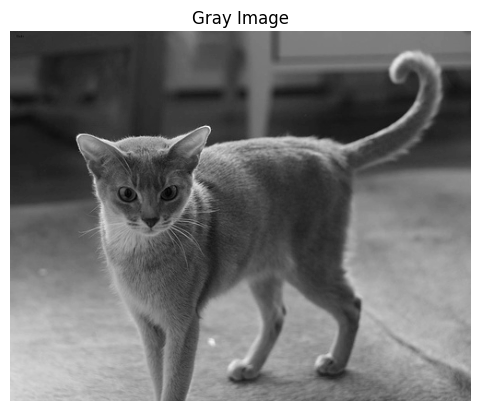

In [ ]:
def rgb2gray(image):
  rows, cols, channels = image.shape

  output = np.zeros((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      r, g, b = image[i, j]
      output[i, j] = r*0.29 + g*0.58 + b*0.11

  return output

img2 = cv2.imread('/content/DIP_Lab_task_02.jpg')
gray_img = rgb2gray(img2)

plt.imshow(gray_img, cmap = 'gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

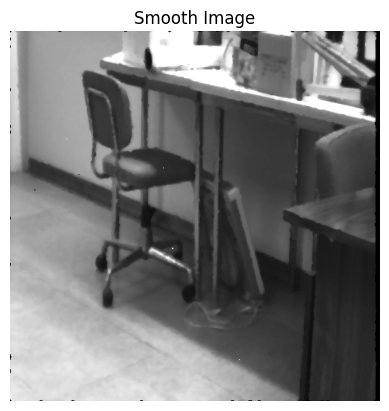

In [ ]:
#image smoothing
def conv(image, kernel):
  kernelh, kernelw = kernel.shape
  padh = kernelh//2
  padw = kernelw//2

  padded_image = np.pad(image, ((padh, padh), (padw, padw)), 'constant')

  rows, cols = image.shape
  output = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
        roi = padded_image[i:i+kernelh, j:j+kernelw]
        output[i, j] = np.median(roi)

  return output

img3 = cv2.imread('/content/DIP_Lab_task_03.bmp')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
smoothing_kernel = np.ones((5, 5), dtype=np.uint8)/9

smooth_img = conv(img3_gray, smoothing_kernel)


plt.imshow(smooth_img, cmap = 'gray')
plt.axis('off')
plt.title('Smooth Image')
plt.show()

In [ ]:
img4 = cv2.imread('/content/DIP_Lab_task_04.jpg', 0)
img4 = cv2.cvtColor(cv2.COLOR_BGR2RGB)
def gammaTrans(image, gamma, c = 1):
  normal = image/255
  normal = normal ** gamma
  normal = normal * 255
  normal = normal.astype(np.uint8);
  return normal


def logTrans(image, c=1):
  normal = image/255

  rows, cols, channels = img4.shape

  for i in range(rows):
    for j in range(cols):
      for k in range(channels):
        normal[i, j, k] = min(255, c * np.log1p(normal[i, j, k]))

  normal = normal * 255
  normal = normal.astype(np.uint8);
  return normal

plt.imshow(img4)
plt.axis('off')
plt.title('Original Image1')
plt.show()
dark_img = gammaTrans(img4, 5)
plt.imshow(dark_img)
plt.axis('off')
plt.title('dark Image(gamma)')
plt.show()

dark1 = logTrans(img4, 1)
plt.imshow(dark1)
plt.axis('off')
plt.title('dark Image1(log)')
plt.show()

NameError: name 'cv2' is not defined

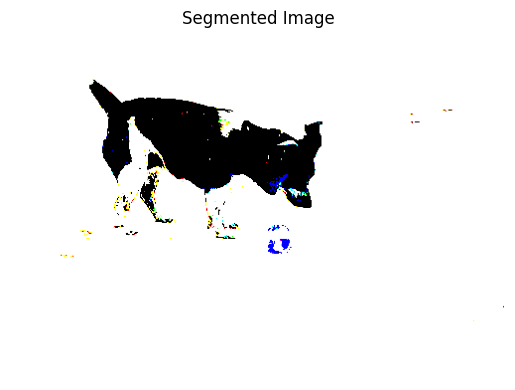

In [ ]:
#segmentation
img5 = cv2.imread('/content/DIP_Lab_task_05.jpg')

threshold = 127

rows, cols, channels = img5.shape

for i in range(rows):
  for j in range(cols):
    for k in range(channels):
      if img5[i, j, k]>threshold:
        img5[i, j, k] = 255
      else:
        img5[i, j, k] = 0

plt.imshow(img5, cmap = 'gray')
plt.axis('off')
plt.title('Segmented Image')
plt.show()